 75.  ] 0.0
-0.5381721198014593 [59.    0.    0.   23.82 80.  ] 0.0
-0.23414419596042357 [61.    0.    0.   25.31 90.  ] 0.0
17.397074823075144 [56.    1.    0.   21.85 76.  ] 3.0
0.8239508240344424 [43.    0.    0.   25.62 92.  ] 0.0
0.1093050126851387 [46.    0.    0.   24.62 75.  ] 0.0
17.948305935192668 [54.    1.    0.   28.35 69.  ] 9.0
16.548736230217553 [62.    1.    0.   20.87 60.  ] 20.0
17.65343808499907 [40.    1.    0.   19.98 60.  ] 35.0
-0.03136438082322446 [51.    0.    0.   24.58 80.  ] 0.0
0.22059306683222424 [40.    0.    0.   26.56 60.  ] 0.0
19.356619663971944 [39.    1.    0.   30.08 85.  ] 1.0
-0.23254683116462682 [56.    0.    0.   28.61 68.  ] 0.0
18.62238114381956 [47.    1.    0.   24.49 94.  ] 25.0
-0.9597012292231359 [66.    0.    0.   25.59 72.  ] 0.0
-0.6570777930803129 [52.  0.  0. 22. 68.] 0.0
0.32516198922602024 [67.    0.    0.   44.09 55.  ] 0.0
-0.43831884750485606 [56.    0.    0.   25.66 71.  ] 0.0
-0.756854058096573 [58.    0.    1.   27.73 72.  

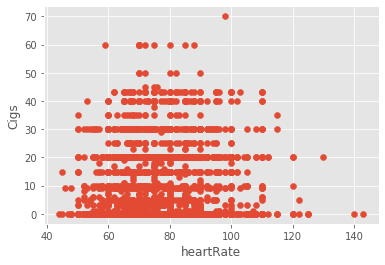

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
data = pd.read_csv("heart.csv")

data = data[["age", "cigsPerDay", "currentSmoker", "diabetes", "BMI", "heartRate"]]
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

predict = "cigsPerDay"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

best = 0
for _ in range(1):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
    with open("heartrate.pickle", "wb") as f:
        pickle.dump(linear, f)

pickle_in = open("heartrate.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

p = 'heartRate'
style.use("ggplot")
pyplot.scatter(data[p],data["cigsPerDay"])
pyplot.xlabel(p)
pyplot.ylabel("Cigs")
pyplot.show()